# DATA CLEANING.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("Salary_Data.csv")

# Dataset from kagglehub by Ahmadrazakashif.
'''
import kagglehub

# Download latest version
path = kagglehub.dataset_download("ahmadrazakashif/salary-data")

print("Path to dataset files:", path)
'''

'\nimport kagglehub\n\n# Download latest version\npath = kagglehub.dataset_download("ahmadrazakashif/salary-data")\n\nprint("Path to dataset files:", path)\n'

## Look the first 5 rows.

In [4]:
df.head()

,Unnamed: 0,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,0,32.0,male,Bachelor,Software Engineer,5.0,90000.0
1,1,28.0,female,Master,Data Analyst,3.0,65000.0
2,2,45.0,male,phd,Senior Manager,15.0,150000.0
3,3,36.0,female,Bachelor,Sales Associate,7.0,60000.0
4,4,52.0,male,Master,Director,20.0,200000.0


## Last 5 rows.

In [5]:
df.tail()

,Unnamed: 0,Age,Gender,Education Level,Job Title,Years of Experience,Salary
1779,6623,43.0,female,Master,Digital Marketing Manager,15.0,150000.0
1780,6624,27.0,male,high school,Sales Manager,2.0,40000.0
1781,6625,33.0,female,Bachelor,Director of Marketing,8.0,80000.0
1782,6628,37.0,male,Bachelor,Sales Director,7.0,90000.0
1783,6631,30.0,female,Bachelor,Sales Manager,5.0,70000.0


## Dataset Size.

In [6]:
print("Rows:", df.shape[0], "Columns:", df.shape[1])


Rows: 1784 Columns: 7


## General Information.

In [7]:
# This step is essential because the dataset has 187.531 rows and there is columns with less rows that should be.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1784 entries, 0 to 1783
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           1784 non-null   int64  
 1   Age                  1784 non-null   float64
 2   Gender               1784 non-null   object 
 3   Education Level      1784 non-null   object 
 4   Job Title            1784 non-null   object 
 5   Years of Experience  1784 non-null   float64
 6   Salary               1784 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 97.7+ KB


## Check Null Values By Columns.

In [8]:
df.isnull().sum()

Unnamed: 0             0
Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
dtype: int64

# Clean data after copy it.

In [9]:
df_clean = df.copy()

In [10]:
df_clean.dropna(inplace=True)
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1784 entries, 0 to 1783
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           1784 non-null   int64  
 1   Age                  1784 non-null   float64
 2   Gender               1784 non-null   object 
 3   Education Level      1784 non-null   object 
 4   Job Title            1784 non-null   object 
 5   Years of Experience  1784 non-null   float64
 6   Salary               1784 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 97.7+ KB


# Count of levels (or sub-levels) in categorical columns.

In [11]:
cols_cat = ['Gender','Education Level','Job Title']

for col in cols_cat:
    print(f'Column {col}: {df_clean[col].nunique()} sub-levels')

Column Gender: 3 sub-levels
Column Education Level: 4 sub-levels
Column Job Title: 191 sub-levels


## Descriptive Stadistic.

In [12]:
df.describe()

,Unnamed: 0,Age,Years of Experience,Salary
count,1784.000000,1784.000000,1784.000000,1784.000000
mean,2844.630605,35.095291,9.138453,113038.669843
std,2052.786589,8.147470,6.837051,51516.786750
min,0.000000,21.000000,0.000000,350.000000
25%,1109.750000,29.000000,3.000000,70000.000000
50%,2631.500000,33.000000,8.000000,110000.000000
75%,4519.250000,41.000000,13.000000,160000.000000
max,6631.000000,60.000000,34.000000,250000.000000


# Repeated Rows.

In [13]:
print(f'Data size before delete repetead rows:{df_clean.shape}')
df_clean.drop_duplicates(inplace=True)
print(f'Data size after delete repetead rows:{df_clean.shape}')

Data size before delete repetead rows:(1784, 7)
Data size after delete repetead rows:(1784, 7)


# Outliers.

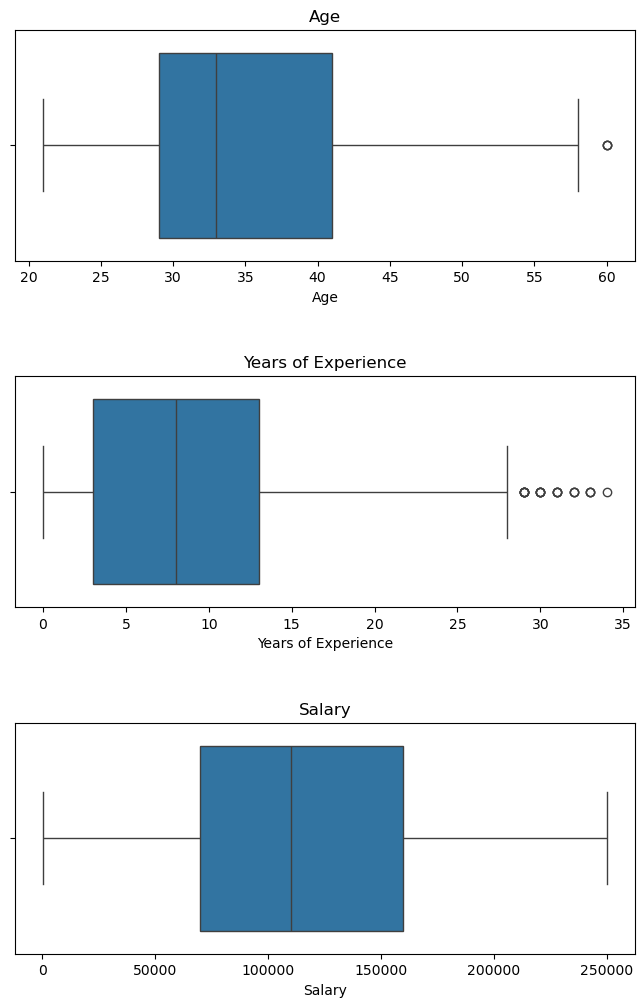

In [14]:
cols_num = ['Age','Years of Experience','Salary']

fig, ax = plt.subplots(nrows=len(cols_num), ncols=1 , figsize=(8,12))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(cols_num):
    sns.boxplot(x=col, data=df_clean, ax=ax[i])
    ax[i].set_title(col)

In [15]:
# Delete Outliers.

print(f'Dataset size before delete outliers in Age column: {df_clean.shape}')
df_clean = df_clean[df_clean['Age']<= 60]
print(f'Dataset size after delete ourliers in age column: {df_clean.shape}')

Dataset size before delete outliers in Age column: (1784, 7)
Dataset size after delete ourliers in age column: (1784, 7)


In [16]:
print(f'Dataset size before delete outliers in Years of Experience column: {df_clean.shape}')
df_clean = df_clean[df_clean["Years of Experience"]<= 35]
print(f'Dataset size after delete outliers in Years of Experience column: {df_clean.shape}')

Dataset size before delete outliers in Years of Experience column: (1784, 7)
Dataset size after delete outliers in Years of Experience column: (1784, 7)


# Categorical values chart.

C:\Users\Liz\AppData\Local\Temp\ipykernel_29720\4030677898.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=30)
C:\Users\Liz\AppData\Local\Temp\ipykernel_29720\4030677898.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=30)


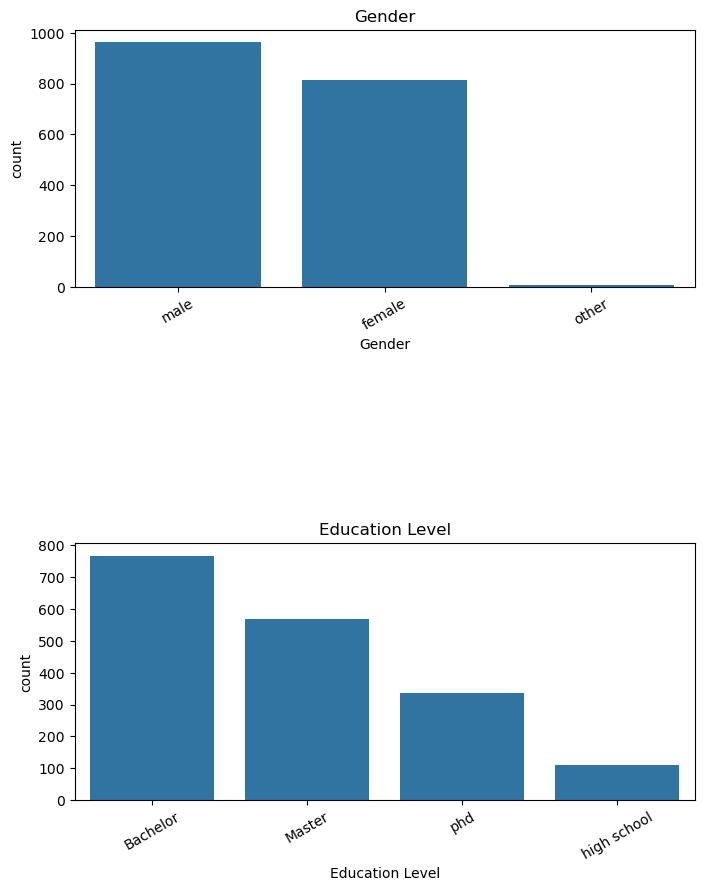

In [18]:
cols_cat = ['Gender', 'Education Level',]

fig, ax = plt.subplots(nrows=len(cols_cat), ncols=1, figsize=(8,10))
fig.subplots_adjust(hspace=1)

for i, col in enumerate(cols_cat):
    sns.countplot(x=col, data=df_clean, ax=ax[i])
    ax[i].set_title(col)
    ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=30)

# Changes categorical values into lowercase words.

In [ ]:
for column in df_clean.columns:
    if column in cols_cat:
        df_clean[column] = df_clean[column].str.lower() 

# Categorical values chart again.

In [ ]:
fig, ax = plt.subplots(nrows =len(cols_cat), ncols = 1 , figsize=(8,12))
fig.subplots_adjust(hspace=1)

for i, col in enumerate(cols_cat):
    sns.countplot(x=col, data=df_clean, ax=ax[i])
    ax[i].set_title(col)
    ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation= 30)

# Standarise same words.

In [ ]:
# Add each word that means the same into unique word.
standarise = {
    "bachelor's degree" : "Bachelor",
    "bachelor's" : "Bachelor",
    "bachelor" : "Bachelor",
    "master's degree" : "Master",
    "master's" : "Master",
    "master" : "Master"
}

In [ ]:
print(df_clean['Education Level'].unique())
df_clean['Education Level'] = df_clean['Education Level'].replace(standarise)
print(df_clean['Education Level'].unique())

In [ ]:
df_clean.shape

In [ ]:
df_clean.to_csv("salary_clean.csv", index=False)